# Querying Oracle from Python using Oracledb
This is an example of how to query Oracle from Python using Oracle's library oracledb.  
Oracledb is the reccomended driver for Python for Oracle databases and supersedes cx_Oracle https://oracle.github.io/python-oracledb/  


## Setup and prerequisites

This is how you can setup a local Oracle instance for testing using a docker image for oracle-free.  
CERN users can also use accounts on a development database (contact Oracle service at CERN to request one)

**1. run Oracle Free on a container from gvenzl dockerhub repo https://github.com/gvenzl/oci-oracle-free**

Run oracle free on a container from gvenzl dockerhub repo  
see also https://github.com/gvenzl/oci-oracle-free  
`docker run -d --name mydb1 -e ORACLE_PASSWORD=oracle -p 1521:1521 gvenzl/oracle-free:latest`

Wait till the DB is started, it will take a few minutes  
check progress with:  
`docker logs -f mydb1`


**2. Install the scott/tiger schema with the emp table in PDB freepdb1:**
```
docker exec -it mydb1 /bin/bash
sed -e s=SCOTT/tiger=SCOTT/tiger@freepdb1= -e s/OFF/ON/ /opt/oracle/product/23c/dbhomeFree/rdbms/admin/utlsampl.sql > script.sql
sqlplus system/oracle@freepdb1
@script.sql
```


**Notes on the oracledb library:**   
This uses oracledb to connect to oracle, so no need to install the Oracle client for this example.  
Note: oracledb can also work with the oracle client using `oracledb.init_oracle_client()`, see documentation for details.

## Query Oracle from Python using the Oracledb library + Pandas and SQLAlchemy

In [1]:
# connect to Oracle using oracledb
# !pip install oracledb

import oracledb

# To avoid storing connection passwords use getpas or db_config
# import getpass
# db_pass = getpass.getpass()

db_user = 'scott'
db_pass = 'tiger'

# db_connect_string = 'dbserver:1521/orcl.mydomain.com'
db_connect_string = 'localhost:1521?service_name=freepdb1'


In [2]:
import pandas as pd
from sqlalchemy import create_engine

# create SQLAlchemy engine
engine = create_engine(f"oracle+oracledb://{db_user}:{db_pass}@{db_connect_string}")


In [3]:
# SQL query as a string
sql_query = 'select * from emp'

# use the engine to run the query and put the result into a pandas DataFrame
df_ora = pd.read_sql(sql_query, engine)


In [4]:
df_ora

,empno,ename,job,mgr,hiredate,sal,comm,deptno
0,7369,SMITH,CLERK,7902.0,1980-12-17,800.0,NaN,20
1,7499,ALLEN,SALESMAN,7698.0,1981-02-20,1600.0,300.0,30
2,7521,WARD,SALESMAN,7698.0,1981-02-22,1250.0,500.0,30
3,7566,JONES,MANAGER,7839.0,1981-04-02,2975.0,NaN,20
4,7654,MARTIN,SALESMAN,7698.0,1981-09-28,1250.0,1400.0,30
5,7698,BLAKE,MANAGER,7839.0,1981-05-01,2850.0,NaN,30
6,7782,CLARK,MANAGER,7839.0,1981-06-09,2450.0,NaN,10
7,7788,SCOTT,ANALYST,7566.0,1987-04-19,3500.0,NaN,20
8,7839,KING,PRESIDENT,NaN,1981-11-17,5000.0,NaN,10
9,7844,TURNER,SALESMAN,7698.0,1981-09-08,1500.0,0.0,30


## Use of bind variables
Bind variables are placeholders in SQL queries, useful to promote SQL statement reuse and to avoid sql injection

In [5]:
df_ora = pd.read_sql('select * from emp where empno=:myempno', engine, 
                     params={"myempno":7839}) 
df_ora

,empno,ename,job,mgr,hiredate,sal,comm,deptno
0,7839,KING,PRESIDENT,None,1981-11-17,5000.0,None,10


## Basic visualization

In [6]:
import matplotlib.pyplot as plt 


In [7]:
df_ora = pd.read_sql('select ename "Name", sal "Salary" from emp', engine)    


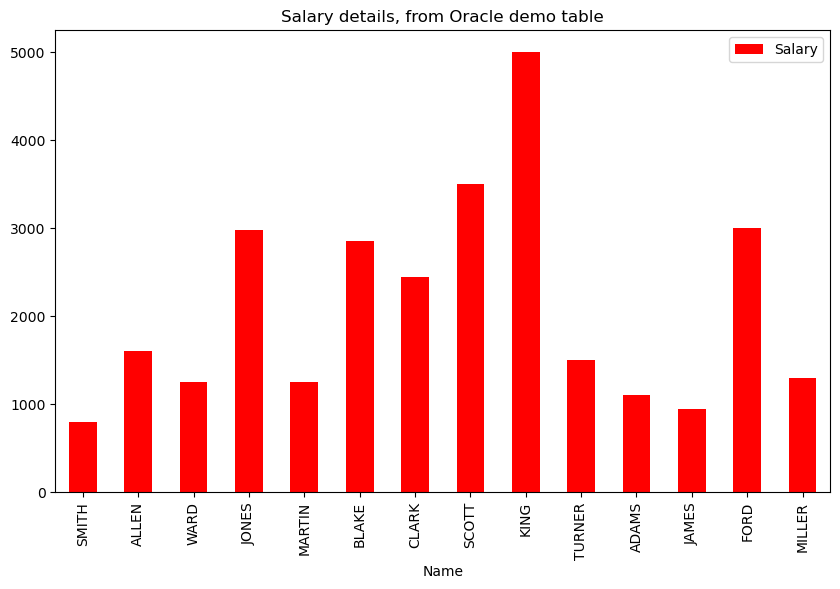

In [8]:
df_ora.plot(x='Name', y='Salary', title='Salary details, from Oracle demo table', 
            figsize=(10, 6), kind='bar', color='red');